In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 123456)

# Decision tree training, validation, and result visualization

In [4]:
# training
dtree = tree.DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
# View properties
dtree.classes_
dtree.feature_importances_
dtree.max_features_
dtree.n_classes_
dtree.n_features_in_
dtree.n_outputs_
dtree.tree_

array([0, 1, 2])

array([0.02913253, 0.        , 0.41379753, 0.55706995])

4

np.int64(3)

4

1

## Validate with the test set

In [6]:
pred = dtree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



## Visually view the decision tree results

### Method 1: Generate a pdf file

In [8]:
import pydotplus
dot_data = tree.export_graphviz(dtree, out_file = None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

True

### Method 2: Display images directly in Jupyter

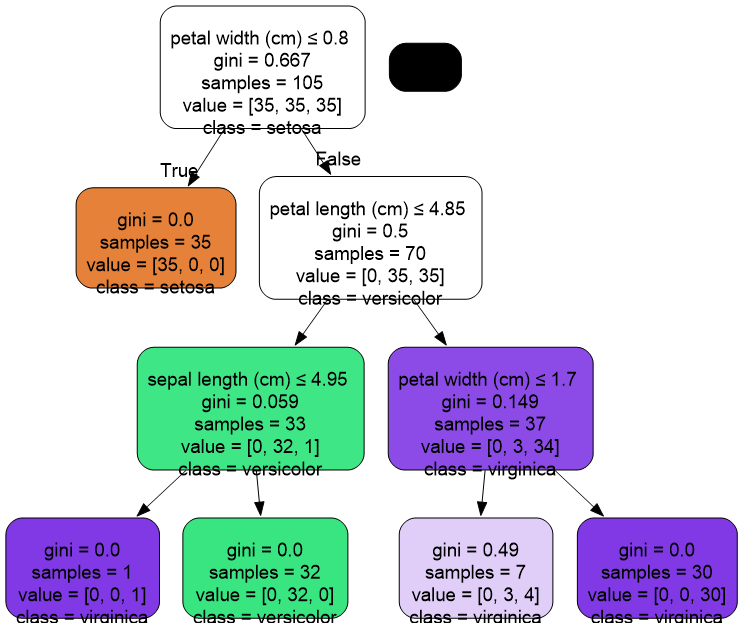

In [10]:
from IPython.display import Image
dot_data = tree.export_graphviz(dtree, out_file = None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Search for optimal parameters using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8]
}

dtree = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, parameters, scoring = 'accuracy', cv = 5)
grid_search.fit(x, y)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [12]:
grid_search.best_estimator_
grid_search.best_score_
grid_search.best_params_

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


np.float64(0.9666666666666668)

{'criterion': 'gini', 'max_depth': 5}

## Modeling with optimal parameters

In [13]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
pred = dtree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



## View the decision tree

In [15]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


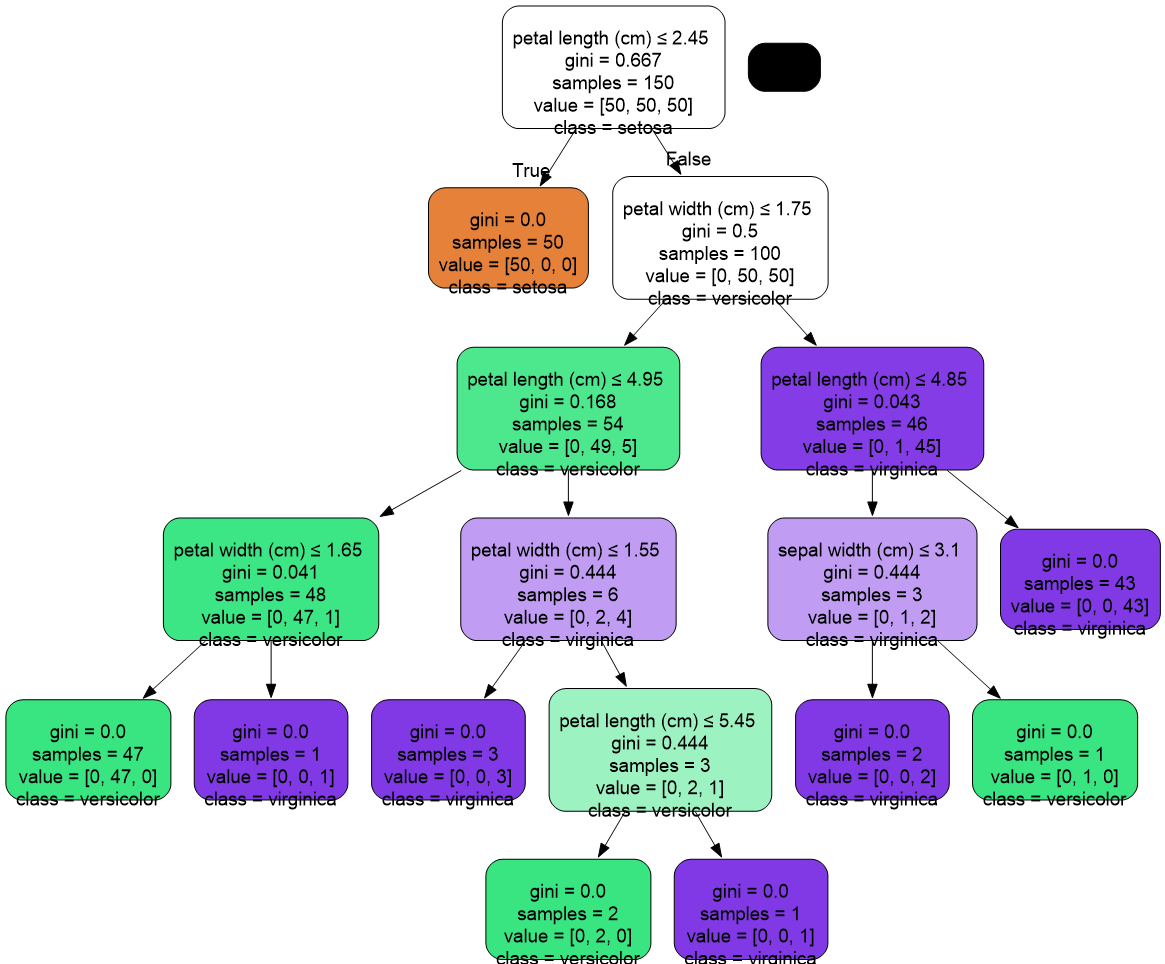

In [16]:
dot_data = tree.export_graphviz(dtree, out_file = None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())